<a href="https://colab.research.google.com/github/Kir4itsu/CRUDaplikasiPHP/blob/main/analisis_sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

import re
import string

In [3]:
from google.colab import files
uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [4]:
file_path = '/content/training.1600000.processed.noemoticon.csv'  # pastikan sudah di-upload
cols = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='latin-1', names=cols)


In [5]:
df = df[['target', 'text']]

In [6]:
df['target'] = df['target'].replace(4, 1)

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # hapus URL
    text = re.sub(r'\@w+|\#','', text)  # hapus mention dan hashtag
    text = re.sub(r'[^A-Za-z\s]', '', text)  # hapus angka dan tanda baca
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [9]:
X = df['clean_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [12]:
y_pred = svm_model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif']))


Classification Report:

              precision    recall  f1-score   support

     Negatif       0.80      0.77      0.79    159494
     Positif       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



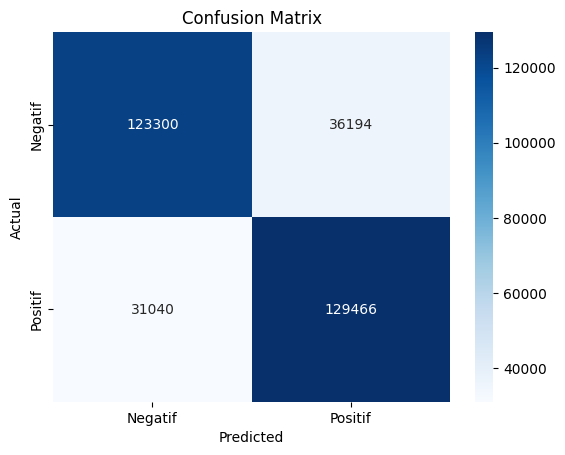

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()